In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from scipy.stats import entropy
from sklearn.linear_model import LogisticRegression
from polyagamma import random_polyagamma
from utils.generate import GenerateData_binomial
from utils.metrics import KLD
from models.proposed_method import proposed_method_binomial
from models.compared_methods import compared_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

# バイアスアルゴリズム：ステップ

In [10]:
Ex_num = 100 # パラメータを生成する回数

# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [1]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

threshfold = 2

sample_size_list = np.linspace(100,1000,10).astype(int)

KL_list = [] # 結果格納用 (threshfoldの数, 3)→ 標本平均, 比較手法，提案手法

for sample_size in sample_size_list:

    KL_list_proposed_by_condition = []
    KL_list_sample_mean_by_condition = []
    KL_list_ML_by_condition = []

    trial = 0
    with tqdm() as pbar:
        while trial < Ex_num: # パラメータによるモンテカルロ平均（ベイズ最適な推定量）
            # クラスをインスタンス化
            generator = GenerateData_binomial(
                n_features=n_features,
                X_mu_list=X_mu,
                X_sigma_list=X_sigma,
                beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
                beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
            )

            # データを生成
            X, y = generator.generate_non_bias_data()
            X_bias, y_bias = generator.generate_bias_data(n_samples=sample_size, X_features_bias= 1 , threshfold= threshfold,sample_type="threshfold_step")

            if (y_bias.mean() != 1) & (y_bias.mean() != 0): # 0と1両方あるサンプルが生成できた場合のみ計算を実行する

                b_0 = np.array([0.001, 0.001])
                B_0 = np.array([np.diag([100, 100])]) # B_0の形状を変更

                burn = 2000
                draw = 5000

                # proposed_method_binomialのインスタンスを作成
                method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更
                compared_method = compared_methods(X_bias, y_bias, X_mu, X_sigma)

                # sample_betaメソッドを実行
                beta_posterior = method.sample_beta()

                P_true = y.mean()
                P_sample_mean = y_bias.mean()
                P_ML = compared_method.maximum_likelihood(draw=draw)
                P_proposed = method.estimate()

                KL_list_sample_mean_by_condition.append(KLD(P_true, P_sample_mean))
                KL_list_ML_by_condition.append(KLD(P_true, P_ML))
                KL_list_proposed_by_condition.append(KLD(P_true, P_proposed))

                pbar.update(1)
                trial += 1
            else:
                print("バイアスサンプルの生成に失敗しました")

    # 提案手法と比較手法の結果を表示
    print(f"実験条件:{threshfold=}")
    print("サンプル平均P:", np.mean(KL_list_sample_mean_by_condition))
    print("最尤推定P:", np.mean(KL_list_ML_by_condition))
    print("提案手法P:", np.mean(KL_list_proposed_by_condition))

    KL_list.append([np.mean(KL_list_sample_mean_by_condition), np.mean(KL_list_ML_by_condition), np.mean(KL_list_proposed_by_condition)])
KL_list

100it [01:23,  1.20it/s]


実験条件:threshfold=2
サンプル平均P: 0.12504494237747257
最尤推定P: 0.0029707256307093177
提案手法P: 0.0018090458557990796


100it [02:37,  1.58s/it]


実験条件:threshfold=2
サンプル平均P: 0.11829229706469645
最尤推定P: 0.00257422572853674
提案手法P: 0.0010050376208862633


100it [03:41,  2.21s/it]


実験条件:threshfold=2
サンプル平均P: 0.1158319184189112
最尤推定P: 0.002371198921533817
提案手法P: 0.0006054941123216296


100it [07:30,  4.51s/it]


実験条件:threshfold=2
サンプル平均P: 0.11656488489398249
最尤推定P: 0.0023143859464030926
提案手法P: 0.0004282899662458195


100it [11:26,  6.87s/it]


実験条件:threshfold=2
サンプル平均P: 0.11517425888238624
最尤推定P: 0.0022865745540590556
提案手法P: 0.0005219329172309528


100it [16:47, 10.07s/it]


実験条件:threshfold=2
サンプル平均P: 0.11436125008997801
最尤推定P: 0.0024507005867620713
提案手法P: 0.0003282251897636301


100it [22:22, 13.42s/it]


実験条件:threshfold=2
サンプル平均P: 0.11719544540256026
最尤推定P: 0.002541358715949539
提案手法P: 0.0002909268506534923


100it [28:09, 16.90s/it]


実験条件:threshfold=2
サンプル平均P: 0.11397402896061574
最尤推定P: 0.0024185326088020363
提案手法P: 0.00023415414562099278


100it [34:53, 20.94s/it]


実験条件:threshfold=2
サンプル平均P: 0.11723477640855334
最尤推定P: 0.002258707611127584
提案手法P: 0.00025822834437197017


100it [45:36, 27.36s/it]

実験条件:threshfold=2
サンプル平均P: 0.11693449418257484
最尤推定P: 0.0024008858885123806
提案手法P: 0.0002542331837685818


[[np.float64(0.12504494237747257),
  np.float64(0.0029707256307093177),
  np.float64(0.0018090458557990796)],
 [np.float64(0.11829229706469645),
  np.float64(0.00257422572853674),
  np.float64(0.0010050376208862633)],
 [np.float64(0.1158319184189112),
  np.float64(0.002371198921533817),
  np.float64(0.0006054941123216296)],
 [np.float64(0.11656488489398249),
  np.float64(0.0023143859464030926),
  np.float64(0.0004282899662458195)],
 [np.float64(0.11517425888238624),
  np.float64(0.0022865745540590556),
  np.float64(0.0005219329172309528)],
 [np.float64(0.11436125008997801),
  np.float64(0.0024507005867620713),
  np.float64(0.0003282251897636301)],
 [np.float64(0.11719544540256026),
  np.float64(0.002541358715949539),
  np.float64(0.0002909268506534923)],
 [np.float64(0.11397402896061574),
  np.float64(0.0024185326088020363),
  np.float64(0.00023415414562099278)],
 [np.float64(0.11723477640855334),
  np.float64(0.002258707611127584),
  np.float64(0.00025822834437197017)],
 [np.float64(0

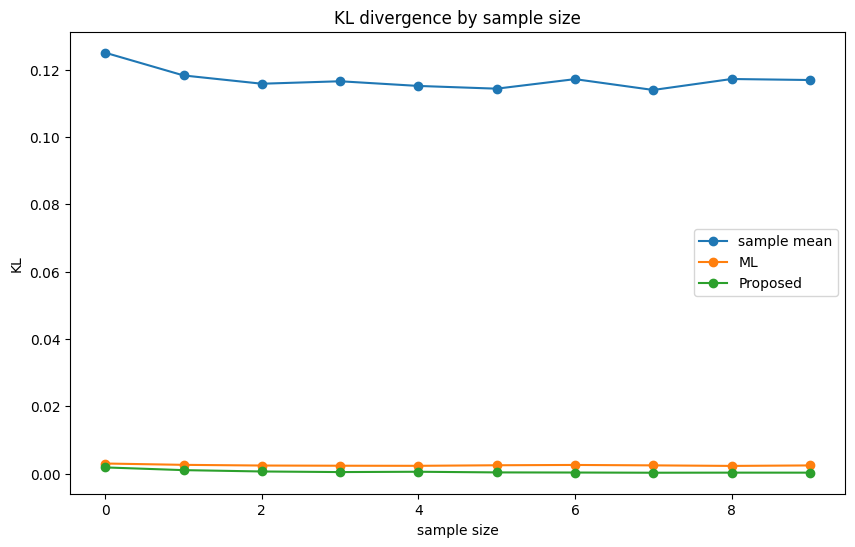

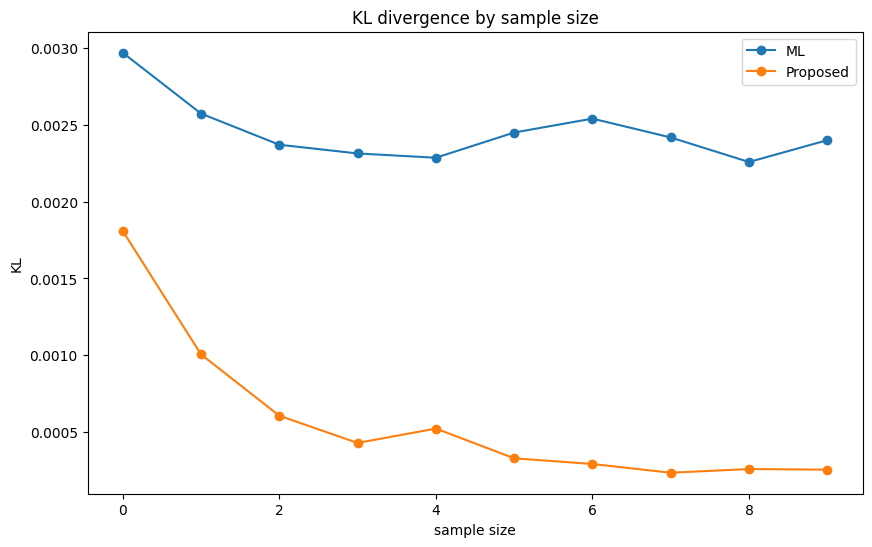

In [11]:
KL_list = np.array(KL_list).T
label = ["sample mean", "MLE", "Proposed"]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(KL_list[i], marker='o', linestyle='-', label=label[i]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size")
plt.ylabel("KL")
plt.legend()
plt.title("KL divergence by sample size")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(KL_list[i+1], marker='o', linestyle='-', label=label[i+1]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size")
plt.ylabel("KL")
plt.legend()
plt.title("KL divergence by sample size")
plt.show()


# $P_{prop}(Z|X)$

In [5]:
Ex_num = 2 # パラメータを生成する回数

# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [0]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

threshfold = 2

sample_size_list = np.linspace(100,1000,10).astype(int)

KL_list = [] # 結果格納用 (threshfoldの数, 3)→ 標本平均, 比較手法，提案手法

for sample_size in sample_size_list:

    KL_list_proposed_by_condition = []
    KL_list_sample_mean_by_condition = []
    KL_list_ML_by_condition = []

    trial = 0
    with tqdm() as pbar:
        while trial < Ex_num: # パラメータによるモンテカルロ平均（ベイズ最適な推定量）
            # クラスをインスタンス化
            generator = GenerateData_binomial(
                n_features=n_features,
                X_mu_list=X_mu,
                X_sigma_list=X_sigma,
                beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
                beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
            )

            # データを生成
            X, y = generator.generate_non_bias_data()
            X_bias, y_bias, _ = generator.generate_bias_data(n_samples=sample_size, X_features_bias= 1 , threshfold= threshfold,sample_type="prop")

            if (y_bias.mean() != 1) & (y_bias.mean() != 0): # 0と1両方あるサンプルが生成できた場合のみ計算を実行する

                b_0 = np.array([0.001, 0.001])
                B_0 = np.array([np.diag([10, 10])]) # B_0の形状を変更

                burn = 5000
                draw = 10000

                # proposed_method_binomialのインスタンスを作成
                method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更
                compared_method = compared_methods(X_bias, y_bias, X_mu, X_sigma)

                # sample_betaメソッドを実行
                beta_posterior = method.sample_beta()

                P_true = y.mean()
                P_sample_mean = y_bias.mean()
                P_ML = compared_method.maximum_likelihood(draw=draw)
                P_proposed = method.estimate()

                KL_list_sample_mean_by_condition.append(KLD(P_true, P_sample_mean))
                KL_list_ML_by_condition.append(KLD(P_true, P_ML))
                KL_list_proposed_by_condition.append(KLD(P_true, P_proposed))

                pbar.update(1)
                trial += 1
            #else:
            #    print("バイアスサンプルの生成に失敗しました")

    # 提案手法と比較手法の結果を表示
    print(f"実験条件:{threshfold=}")
    print("サンプル平均P:", np.mean(KL_list_sample_mean_by_condition))
    print("最尤推定P:", np.mean(KL_list_ML_by_condition))
    print("提案手法P:", np.mean(KL_list_proposed_by_condition))

    KL_list.append([np.mean(KL_list_sample_mean_by_condition), np.mean(KL_list_ML_by_condition), np.mean(KL_list_proposed_by_condition)])
KL_list

2it [00:06,  3.31s/it]


実験条件:threshfold=2
サンプル平均P: 0.15048819860972057
最尤推定P: 0.003461958907203133
提案手法P: 0.00041850210579341685


2it [00:13,  6.82s/it]


実験条件:threshfold=2
サンプル平均P: 0.20983375419204697
最尤推定P: 0.003278751853036721
提案手法P: 0.00023486084905172122


2it [00:17,  8.52s/it]


実験条件:threshfold=2
サンプル平均P: 0.20499774501163792
最尤推定P: 0.0029079385025354565
提案手法P: 0.00018912255706782233


2it [00:28, 14.18s/it]


実験条件:threshfold=2
サンプル平均P: 0.23049355381303804
最尤推定P: 0.0026060297470740235
提案手法P: 3.095555312010445e-05


2it [00:44, 22.46s/it]


実験条件:threshfold=2
サンプル平均P: 0.22882064969100924
最尤推定P: 0.002813510713572498
提案手法P: 0.00027119070800879497


2it [00:57, 28.87s/it]


実験条件:threshfold=2
サンプル平均P: 0.19930480934716077
最尤推定P: 0.0018958741019792225
提案手法P: 3.771964219290158e-05


2it [01:28, 44.26s/it]


実験条件:threshfold=2
サンプル平均P: 0.21228894575995344
最尤推定P: 0.0020260074067725564
提案手法P: 0.00021952593921953367


2it [01:43, 51.78s/it]


実験条件:threshfold=2
サンプル平均P: 0.20005322603128134
最尤推定P: 0.0015865284964272641
提案手法P: 0.0002390432886417715


2it [02:03, 61.92s/it]


実験条件:threshfold=2
サンプル平均P: 0.18878346126192702
最尤推定P: 0.0016833627551398611
提案手法P: 1.7939377148001867e-05


2it [02:35, 77.91s/it]

実験条件:threshfold=2
サンプル平均P: 0.21023494823161826
最尤推定P: 0.0017498426061452466
提案手法P: 4.834501298545124e-05


[[np.float64(0.15048819860972057),
  np.float64(0.003461958907203133),
  np.float64(0.00041850210579341685)],
 [np.float64(0.20983375419204697),
  np.float64(0.003278751853036721),
  np.float64(0.00023486084905172122)],
 [np.float64(0.20499774501163792),
  np.float64(0.0029079385025354565),
  np.float64(0.00018912255706782233)],
 [np.float64(0.23049355381303804),
  np.float64(0.0026060297470740235),
  np.float64(3.095555312010445e-05)],
 [np.float64(0.22882064969100924),
  np.float64(0.002813510713572498),
  np.float64(0.00027119070800879497)],
 [np.float64(0.19930480934716077),
  np.float64(0.0018958741019792225),
  np.float64(3.771964219290158e-05)],
 [np.float64(0.21228894575995344),
  np.float64(0.0020260074067725564),
  np.float64(0.00021952593921953367)],
 [np.float64(0.20005322603128134),
  np.float64(0.0015865284964272641),
  np.float64(0.0002390432886417715)],
 [np.float64(0.18878346126192702),
  np.float64(0.0016833627551398611),
  np.float64(1.7939377148001867e-05)],
 [np.fl

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


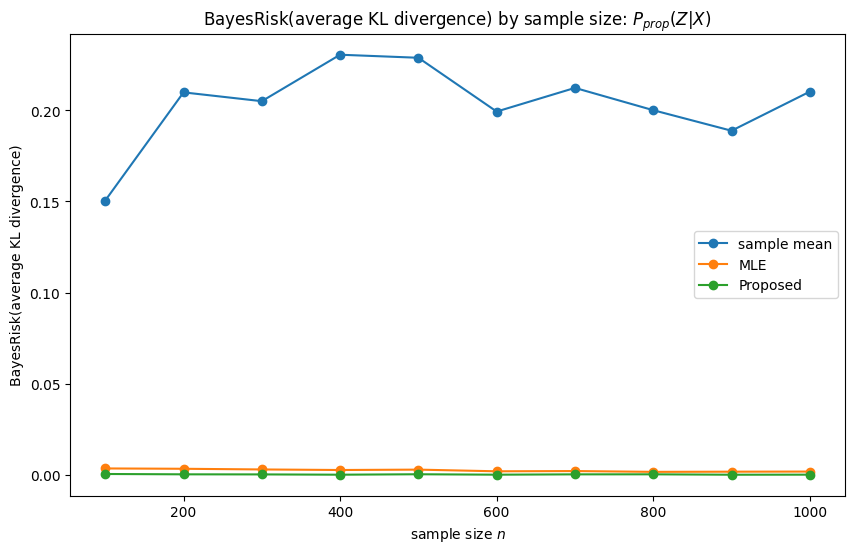

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


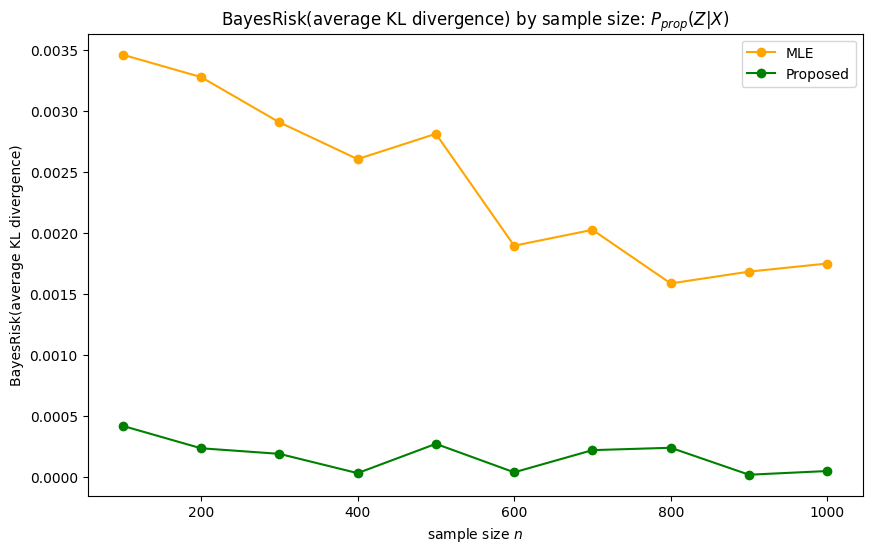

In [8]:
import matplotlib.pyplot as plt
import numpy as np

KL_list = np.array(KL_list).T
label = ["sample mean", "MLE", "Proposed"]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(sample_size_list, KL_list[i], marker='o', linestyle='-', label=label[i]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{prop}(Z|X)$")
plt.savefig("../results/fig/BayesRisk_by_sample_size_prop.png", format="png", dpi=300)
plt.savefig("../results/fig/BayesRisk_by_sample_size_prop.eps", format="eps")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(sample_size_list, KL_list[i+1], marker='o', linestyle='-', label=label[i+1], color = 'orange' if i==0 else 'green') # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{prop}(Z|X)$")
plt.savefig("../results/fig/BayesRisk_by_sample_size_no_sample_mean_prop.png", format="png", dpi=300)
plt.savefig("../results/fig/BayesRisk_by_sample_size_no_sample_mean_prop.eps", format="eps")
plt.show()

# $P_{peak}(Z|X)$

In [9]:
Ex_num = 2 # パラメータを生成する回数

# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [0]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

threshfold = 2

sample_size_list = np.linspace(100,1000,10).astype(int)

KL_list = [] # 結果格納用 (threshfoldの数, 3)→ 標本平均, 比較手法，提案手法

for sample_size in sample_size_list:

    KL_list_proposed_by_condition = []
    KL_list_sample_mean_by_condition = []
    KL_list_ML_by_condition = []

    trial = 0
    with tqdm() as pbar:
        while trial < Ex_num: # パラメータによるモンテカルロ平均（ベイズ最適な推定量）
            # クラスをインスタンス化
            generator = GenerateData_binomial(
                n_features=n_features,
                X_mu_list=X_mu,
                X_sigma_list=X_sigma,
                beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
                beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
            )

            # データを生成
            X, y = generator.generate_non_bias_data()
            X_bias, y_bias, _ = generator.generate_bias_data(n_samples=sample_size, X_features_bias= 1 , threshfold= threshfold,sample_type="norm")

            if (y_bias.mean() != 1) & (y_bias.mean() != 0): # 0と1両方あるサンプルが生成できた場合のみ計算を実行する

                b_0 = np.array([0.001, 0.001])
                B_0 = np.array([np.diag([10, 10])]) # B_0の形状を変更

                burn = 5000
                draw = 10000

                # proposed_method_binomialのインスタンスを作成
                method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更
                compared_method = compared_methods(X_bias, y_bias, X_mu, X_sigma)

                # sample_betaメソッドを実行
                beta_posterior = method.sample_beta()

                P_true = y.mean()
                P_sample_mean = y_bias.mean()
                P_ML = compared_method.maximum_likelihood(draw=draw)
                P_proposed = method.estimate()

                KL_list_sample_mean_by_condition.append(KLD(P_true, P_sample_mean))
                KL_list_ML_by_condition.append(KLD(P_true, P_ML))
                KL_list_proposed_by_condition.append(KLD(P_true, P_proposed))

                pbar.update(1)
                trial += 1
            #else:
            #    print("バイアスサンプルの生成に失敗しました")

    # 提案手法と比較手法の結果を表示
    print(f"実験条件:{threshfold=}")
    print("サンプル平均P:", np.mean(KL_list_sample_mean_by_condition))
    print("最尤推定P:", np.mean(KL_list_ML_by_condition))
    print("提案手法P:", np.mean(KL_list_proposed_by_condition))

    KL_list.append([np.mean(KL_list_sample_mean_by_condition), np.mean(KL_list_ML_by_condition), np.mean(KL_list_proposed_by_condition)])
KL_list

2it [00:05,  2.53s/it]


実験条件:threshfold=2
サンプル平均P: 0.05686378512365409
最尤推定P: 0.0025162191224260555
提案手法P: 6.339274969541231e-05


2it [00:08,  4.12s/it]


実験条件:threshfold=2
サンプル平均P: 0.07394290997159003
最尤推定P: 0.0018779759329330403
提案手法P: 9.033004865138805e-05


2it [00:14,  7.30s/it]


実験条件:threshfold=2
サンプル平均P: 0.05007411850960031
最尤推定P: 0.0024625506910977424
提案手法P: 0.0005117965329372032


2it [00:26, 13.07s/it]


実験条件:threshfold=2
サンプル平均P: 0.05199498678799097
最尤推定P: 0.0022084546326646137
提案手法P: 6.0441894799034834e-05


0it [00:00, ?it/s]

In [ ]:
KL_list = np.array(KL_list).T
label = ["sample mean", "MLE", "Proposed"]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(sample_size_list, KL_list[i], marker='o', linestyle='-', label=label[i]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{peak}(Z|X)$")
plt.savefig("../results/fig/BayesRisk_by_sample_size_peak.png", format="png", dpi=300)
plt.savefig("../results/fig/BayesRisk_by_sample_size_peak.eps", format="eps")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(sample_size_list, KL_list[i+1], marker='o', linestyle='-', label=label[i+1]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{peak}(Z|X)$")
plt.savefig("../results/fig/BayesRisk_by_sample_size_no_sample_mean_peak.png", format="png", dpi=300)
plt.savefig("../results/fig/BayesRisk_by_sample_size_no_sample_mean_peak.eps", format="eps")
plt.show()